# Get data from Yahoo finance
Read financial data and save to the local file.

In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce

def getStockData():
    tickers = []

    tickers.append('AMZN')

    # indexs
    tickers.extend(['^DJI', '^GSPC', '^NDX'])
    
    # Treasury Yield
    tickers.extend(['^IRX', '^FVX', '^TNX', '^TYX'])

    # other companies
    tickers.extend(['AAPL', 'FB', 'GOOG', 'NFLX', 'EBAY', 'CRM', 'MSFT', 'WMT'])
    
    
    # other countries index
    tickers.extend(['000001.SS', '^HSI', '^N225', '^FCHI', '^GDAXI',  '^BSESN'])

    start_date = '2014-1-1'
    end_date = '2018-12-31'

    frames = []
    for ticker in tickers:
        stock_data = data.DataReader(ticker, 'yahoo', start_date, end_date)
        stock_data = stock_data.rename(lambda s: (s.lower() + '-' + ticker).replace(' ', '-'), axis='columns')
        frames.append(stock_data)

    df_final = reduce(lambda left,right: left.join(right), frames)
    
    df_final.to_csv('stockData.csv')
    
#getStockData()

# Process the Data
Add year, month, week, day & date related information

In [2]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('stockData.csv')

df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
data = df.sort_values(ascending=True, by='Date')

add_datepart = True

import re
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    if drop: df.drop(fldname, axis=1, inplace=True)

# Add year, month, week, day & date related information
if add_datepart:
    add_datepart(data, 'Date')
else:
    data.drop('Date', axis=1, inplace=True)
        
train_len = int(len(data) * 0.85)

# drop amzn related data
dropColumns = ['high-AMZN', 'low-AMZN', 'open-AMZN', 'close-AMZN']
for column in dropColumns:
    data.drop(column, axis=1, inplace=True)

# fill the na using previous rows
data.fillna(method='ffill', inplace=True)
# in case the first row data is invalid
data.fillna(method='bfill', inplace=True)

# drop all zero data
data = data.loc[:, (data != 0).any(axis=0)]
print ('data shape:', data.shape)
data.head()

data shape: (1258, 135)


,volume-AMZN,adj-close-AMZN,high-^DJI,low-^DJI,open-^DJI,close-^DJI,volume-^DJI,adj-close-^DJI,high-^GSPC,low-^GSPC,...,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end
0,2137800,397.970001,16573.070312,16416.490234,16572.169922,16441.349609,80960000,16441.349609,1845.859985,1827.739990,...,1,1,2,3,2,False,False,False,False,False
1,2210200,396.440002,16518.740234,16439.300781,16456.890625,16469.990234,72770000,16469.990234,1838.239990,1829.130005,...,1,1,3,4,3,False,False,False,False,False
2,3170600,393.630005,16532.990234,16405.519531,16474.039062,16425.099609,89380000,16425.099609,1837.160034,1823.729980,...,1,2,6,0,6,False,False,False,False,False
3,1916000,398.029999,16562.320312,16429.019531,16429.019531,16530.939453,81270000,16530.939453,1840.099976,1828.709961,...,1,2,7,1,7,False,False,False,False,False
4,2316500,401.920013,16528.880859,16416.689453,16527.660156,16462.740234,103260000,16462.740234,1840.020020,1831.400024,...,1,2,8,2,8,False,False,False,False,False


In [3]:
data.columns.values.tolist()

['volume-AMZN',
 'adj-close-AMZN',
 'high-^DJI',
 'low-^DJI',
 'open-^DJI',
 'close-^DJI',
 'volume-^DJI',
 'adj-close-^DJI',
 'high-^GSPC',
 'low-^GSPC',
 'open-^GSPC',
 'close-^GSPC',
 'volume-^GSPC',
 'adj-close-^GSPC',
 'high-^NDX',
 'low-^NDX',
 'open-^NDX',
 'close-^NDX',
 'volume-^NDX',
 'adj-close-^NDX',
 'high-^IRX',
 'low-^IRX',
 'open-^IRX',
 'close-^IRX',
 'adj-close-^IRX',
 'high-^FVX',
 'low-^FVX',
 'open-^FVX',
 'close-^FVX',
 'adj-close-^FVX',
 'high-^TNX',
 'low-^TNX',
 'open-^TNX',
 'close-^TNX',
 'adj-close-^TNX',
 'high-^TYX',
 'low-^TYX',
 'open-^TYX',
 'close-^TYX',
 'adj-close-^TYX',
 'high-AAPL',
 'low-AAPL',
 'open-AAPL',
 'close-AAPL',
 'volume-AAPL',
 'adj-close-AAPL',
 'high-FB',
 'low-FB',
 'open-FB',
 'close-FB',
 'volume-FB',
 'adj-close-FB',
 'high-GOOG',
 'low-GOOG',
 'open-GOOG',
 'close-GOOG',
 'volume-GOOG',
 'adj-close-GOOG',
 'high-NFLX',
 'low-NFLX',
 'open-NFLX',
 'close-NFLX',
 'volume-NFLX',
 'adj-close-NFLX',
 'high-EBAY',
 'low-EBAY',
 'open-

# Scale data 

In [4]:
train = data[:train_len]
valid = data[train_len:]

x_train = train.drop('adj-close-AMZN', axis=1)
y_train = train['adj-close-AMZN']
x_valid = valid.drop('adj-close-AMZN', axis=1)
y_valid = valid['adj-close-AMZN']

#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)


print(x_train[0:2])

        0         1         2         3         4         5         6    \
0  0.045899  0.098295  0.096966  0.106967  0.095034  0.051826  0.095034   
1  0.049079  0.093417  0.099022  0.096684  0.097581  0.041374  0.097581   

        7         8         9   ...   124  125       126   127       128  129  \
0  0.080630  0.080660  0.090831 ...   0.0  0.0  0.033333  0.75  0.000000  0.0   
1  0.073808  0.081908  0.079570 ...   0.0  0.0  0.066667  1.00  0.002755  0.0   

   130  131  132  133  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  

[2 rows x 134 columns]


/Users/yanjingding/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/yanjingding/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
# Use Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,f1_score

model = RandomForestRegressor(n_jobs = -1, n_estimators = 10,
                                 bootstrap = True)
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [16]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

865.0577132421029

/Users/yanjingding/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/yanjingding/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


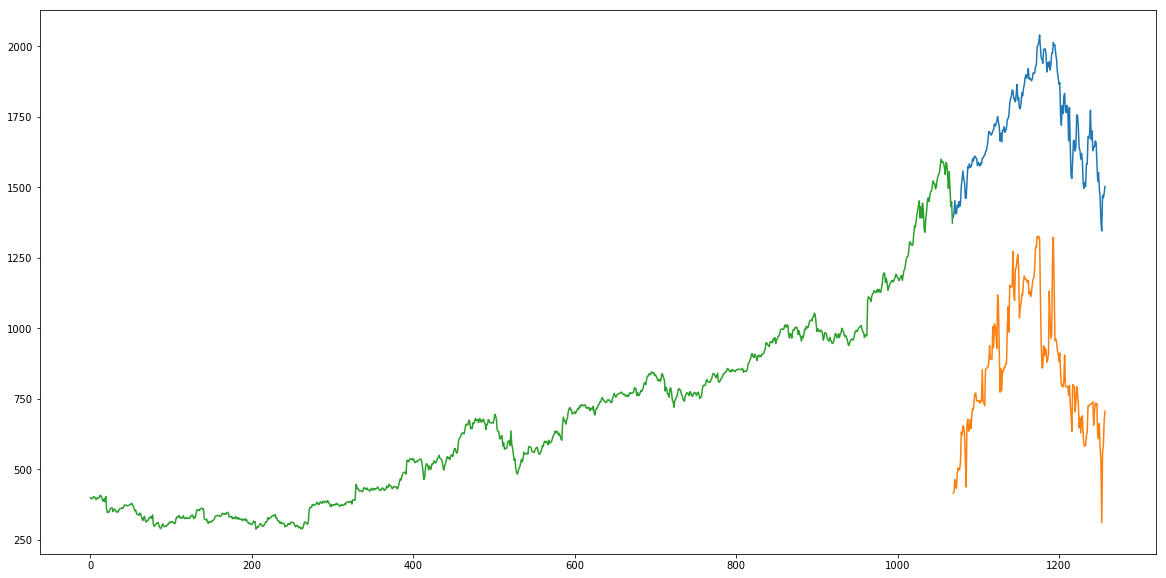

In [17]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['adj-close-AMZN', 'Predictions']])
plt.plot(train['adj-close-AMZN'])

# Use Grid search to tune RF hyperparameter

In [18]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':range(10,20,5), 'max_depth':range(5,100,10), 'min_samples_leaf':range(1,5)}
grid_search = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
grid_search.fit(x_train, y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name])) 

/Users/yanjingding/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best score: -0.712
Best parameters set:
	max_depth: 55
	min_samples_leaf: 4
	n_estimators: 10
